In [1]:
%pylab inline
import pandas as pd
import numpy as np
from collections import Counter
from copy import copy

Populating the interactive namespace from numpy and matplotlib


In [2]:
def diccionario_mujeres(n,listas):

  women_list = obtener_mujeres(n)

  d = {}
  
  for i in range(len(women_list)):
    d[women_list[i]] = listas[i]
  return d

In [3]:
def diccionario_hombres(n,listas):

  #Trasponer laa lista de preferencia, pues es necesario para el dataframe
  man_list = obtener_mujeres(n)

  listas = list(map(list, zip(*listas)))
  d = {}
  
  for i in range(len(man_list)):
    d[man_list[i]] = listas[i]
  return d

In [4]:
def obtener_hombres(n):
  lista = []
  for i in range(1,n+1):
    s = 'H'
    Mi = s+ str(i)
    lista.append(Mi)
  return lista

In [5]:
def obtener_mujeres(n):
  lista = []
  for i in range(1,n+1):
    s = 'M'
    Mi = s+ str(i)
    lista.append(Mi)
  return lista

In [6]:
def dataframe_mujeres(n,listas):
  women_df = pd.DataFrame(diccionario_mujeres(n,listas))
  man_list = obtener_hombres(n)
  women_df.index = man_list
  return women_df

In [7]:
def dataframe_hombres(n,listas):
  man_df = pd.DataFrame(diccionario_hombres(n,listas))
  man_list = obtener_hombres(n)
  man_df.index = man_list
  return man_df

In [8]:
def GaleShapley(n, preferencias_mujeres, preferencias_hombres):

  man_list = obtener_hombres(n)
  women_list = obtener_mujeres(n)

  women_df = dataframe_mujeres(n,preferencias_mujeres)
  man_df = dataframe_hombres(n, preferencias_hombres)

  # dict to control which women each man can make proposals
  women_available = {man:women_list for man in man_list}
  # waiting list of men that were able to create pair on each iteration
  waiting_list = []
  # dict to store created pairs
  proposals = {}
  # variable to count number of iterations
  count = 0



  # while not all men have pairs
  while len(waiting_list)<len(man_list):
      # man makes proposals
      for man in man_list:
          if man not in waiting_list:
              # each man make proposal to the top women from it's list
              women = women_available[man]
              best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
              proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                  women_df.loc[man][best_choice])
      # if women have more than one proposals 
      # she will choose the best option
      overlays = Counter([key[1] for key in proposals.keys()])
      # cycle to choose the best options
      for women in overlays.keys():
          if overlays[women]>1:
              # pairs to drop from proposals
              pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() 
                      if women in pair}.items(), 
                    key=lambda x: x[1][1]
                    )[1:]
              # if man was rejected by woman
              # there is no pint for him to make proposal 
              # second time to the same woman
              for p_to_drop in pairs_to_drop:
                  del proposals[p_to_drop[0]]
                  _women = copy(women_available[p_to_drop[0][0]])
                  _women.remove(p_to_drop[0][1])
                  women_available[p_to_drop[0][0]] = _women
      # man who successfully created pairs must be added to the waiting list 
      waiting_list = [man[0] for man in proposals.keys()]
      # update counter
      count+=1

  #print(proposals)
  #print(count)

  return count

#Punto 1
## n = 4
### mejor caso
- Para obtener el mejor podemos verlo teoricamente, primeramente el mejor caso seria aquel que solo tiene una iteracion, donde cada hombre le hace una propuesta a una mujer diferente y esta acepta, acabando el algoritmo con solo n propuestas, con lo cual podemos obtener muchos dataframes como el mejor solo teniendo en cuenta que cada hombre prefiere como a su mujer preferida a una diferente a la de los demas y lo cual sera lo mismo con las mujeres, lo cual nos da como resultado que tendriamos n propuestas y una sola iteracion o dia

In [9]:
m_list = ['a', 'b', 'c', 'd']
w_list = ['A', 'B', 'C', 'D']

In [10]:
w_df = pd.DataFrame({'A': [2,1,3,4], 'B': [1,2,4,3], 'C':[3,4,2,1], 'D':[4,3,1,2]})
w_df.index = m_list
m_df = pd.DataFrame({'A': [2,1,3,4], 'B': [1,2,4,3], 'C':[3,4,2,1], 'D':[4,3,1,2]})
m_df.index = m_list

In [11]:
w_df

,A,B,C,D
a,2,1,3,4
b,1,2,4,3
c,3,4,2,1
d,4,3,1,2


In [12]:
m_df

,A,B,C,D
a,2,1,3,4
b,1,2,4,3
c,3,4,2,1
d,4,3,1,2


## peor caso
- Para obtener el peor caso, podemos verlo de forma teorica como que cada mujer puede recibir como maximo n propuestas, excepto la ultima por lo tanto tendriamos n(n-1), sin embargo en un ultimo dia recibira la propuesta con la que termina el algoritmo por lo tanto nos queda n(n-1)+1 propuestas, 
Ahora miramos que n propuestas se realizan el primer día, y al menos 1 cada día a partir de entonces hasta que finalice el proceso, por lo que n (n − 1) +1 propuestas tomarán como máximo 1+ (n (n − 1) + 1− n) = n2−2n + 2 días.

In [13]:
def obtenerLista1n(n):
  return list(range(1,n+1))

In [14]:
def obtenerListain(i,n):
  return list(range(i,n+1))

In [15]:
def peorCaso(n):
  list_m =[]
  list_w = []
  for i in range(1,n+1):
    corte1 = obtenerListain(i,n-1)
    corte2 = obtenerLista1n(i-1) + [n]
    fila = corte1 + corte2
    list_m.append(fila)

    corte3 = obtenerListain(i+1,n)
    corte4 = obtenerLista1n(i)
    fila2 = corte3 + corte4
    list_w.append(fila2)

  return list_m, list_w

In [16]:
def pasar_notacion(lista):
  l = len(lista)
  respuesta =[0]*l
  for i in range(l):
    respuesta[lista[i]-1]= i+1
  return respuesta

In [17]:
def pasar_notaciones(listas):
  l = len(listas)
  for i in range(l):
    listas[i] = pasar_notacion(listas[i])
  return listas

In [18]:
def obtenerPeorCaso(n):
  m,w = peorCaso(n)
  m1 = pasar_notaciones(m)
  w1 = pasar_notaciones(w)

  print("Listas de preferencia de los hombres\n")
  ch = 1

  for fila in m:
      label = 'H'+str(ch)+':   '
      print(label,*fila)
      ch = ch +1

  print("\n\nListas de preferencia de las mujeres\n\n")
  cm = 1
  for fila in w:
      label = 'M'+str(cm)+':   '
      print(label,*fila)
      cm = cm +1

  print("\nel numero de iteraciones fue", GaleShapley(n,w,m))

In [19]:
obtenerPeorCaso(4)

Listas de preferencia de los hombres

H1:    1 2 3 4
H2:    3 1 2 4
H3:    2 3 1 4
H4:    1 2 3 4


Listas de preferencia de las mujeres


M1:    4 1 2 3
M2:    3 4 1 2
M3:    2 3 4 1
M4:    1 2 3 4

el numero de iteraciones fue 10


# n = 40
## mejor caso
- Para obtener el mejor podemos verlo teoricamente, primeramente el mejor caso seria aquel que solo tiene una iteracion, donde cada hombre le hace una propuesta a una mujer diferente y esta acepta, acabando el algoritmo con solo n propuestas, con lo cual podemos obtener muchos dataframes como el mejor solo teniendo en cuenta que cada hombre prefiere como a su primera mujer a una diferente, al igual que con 40 las listas de el hombre 1 y mujer 1 y asi sucesivamente deben ser iguales

## peor caso
- Para obtener el peor caso, podemos verlo de forma teorica como que cada mujer puede recibir como maximo n propuestas

In [20]:
obtenerPeorCaso(40)

Listas de preferencia de los hombres

H1:    1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
H2:    39 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 40
H3:    38 39 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 40
H4:    37 38 39 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 40
H5:    36 37 38 39 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 40
H6:    35 36 37 38 39 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 40
H7:    34 35 36 37 38 39 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 40
H8:    33 34 35 36 37 38 39 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 40
H9:    32 33 34 35

#Punto 2

In [21]:
import numpy as np

def preferencia_random(lista_n_personas):
  return list(np.random.permutation(lista_n_personas))

In [22]:
def caso_a_simular(n):
  numeros_1_n = obtenerLista1n(n)

  Matriz_preferencias_mujeres = []
  Matriz_preferencias_hombres = []

  for i in range(n):
    Matriz_preferencias_mujeres.append(preferencia_random(numeros_1_n))

  for i in range(n):
    Matriz_preferencias_hombres.append(preferencia_random(numeros_1_n))
  
  return Matriz_preferencias_mujeres, Matriz_preferencias_hombres

In [23]:
def dias_peor_caso_teorico(n):
  return n**2 - 2*n +2

In [24]:
def simular_n_matchings(numSimulaciones,n):
  teorico = dias_peor_caso_teorico(n)
  ocurrencia = [0]*(teorico + 1)
  
  acumulador = 0
  minimo = teorico +10_000
  maximo = 0

  for i in range(numSimulaciones):

    MP_Msim, MP_Hsim = caso_a_simular(n)

    cuenta = GaleShapley(n, MP_Msim, MP_Hsim)

    ocurrencia[cuenta] +=1
    acumulador = acumulador + cuenta
    minimo = min(cuenta, minimo)
    maximo = max(cuenta,maximo)

  promedio = acumulador/numSimulaciones

  plt.bar(range(0,teorico+1),  ocurrencia)
  plt.title('Distribucion iteraciones\n')
  plt.xlabel('Dias o iteraciones')
  plt.ylabel('Frecuencia')
  plt.show()
  print("n = ",n)
  print("\n\nRESULTADOS EXPERIMENTO")
  print("   Minimo   =  ", minimo)
  print("   Maximo   =  ", maximo)
  print("   Promedio =  ", promedio)

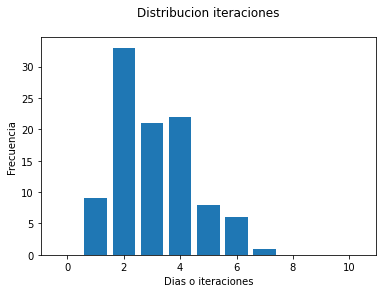

n =  4


RESULTADOS EXPERIMENTO
   Minimo   =   1
   Maximo   =   7
   Promedio =   3.09


In [25]:
simular_n_matchings(100,4)

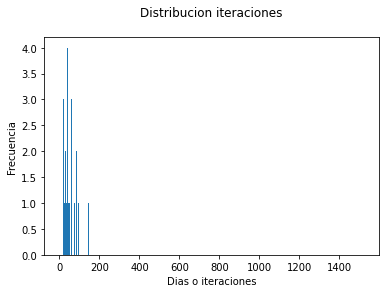

n =  40


RESULTADOS EXPERIMENTO
   Minimo   =   16
   Maximo   =   229
   Promedio =   57.29


In [26]:
simular_n_matchings(100,40)